In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Shalya\\Downloads\\insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Finding missing data count

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Encoding categorical variables

In [10]:
from sklearn.preprocessing import LabelEncoder

In [18]:
#sex
Le = LabelEncoder()
Le.fit(df.sex.drop_duplicates())
df.sex = Le.transform(df.sex)

In [23]:
#smoker
Le.fit(df.smoker.drop_duplicates())
df.smoker = Le.transform(df.smoker)

In [28]:
#region
Le.fit(df.region.drop_duplicates())
df.region = Le.transform(df.region)


In [27]:
df.region.unique()

array([3, 2, 1, 0], dtype=int64)

Finding correlation with Charges

In [32]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [56]:
%matplotlib inline

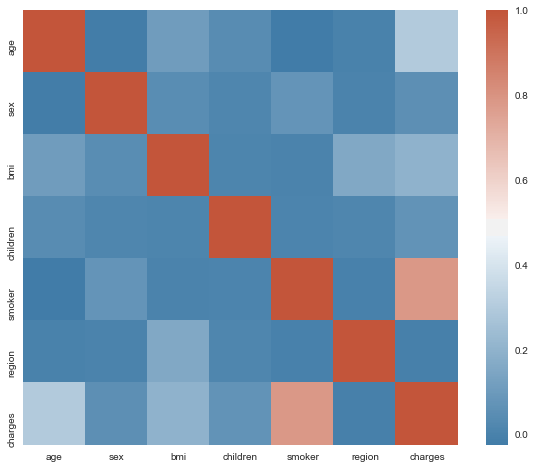

In [66]:
fig, ax = plt.subplots(figsize =(10,8))
corr = df.corr()
sns.set()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  cmap=sns.diverging_palette(240,20,as_cmap=True),
            square=True, ax=ax)

Checking distribution of charges

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

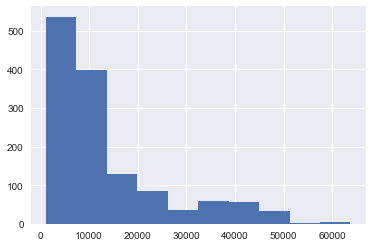

In [68]:
plt.hist(df['charges'])

Text(0.5,1,'Distribution of charges for non-smokers')

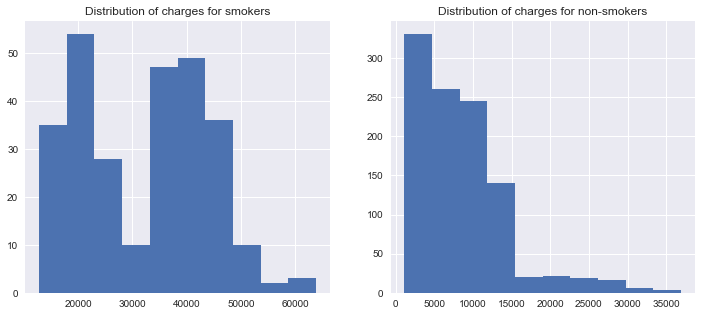

In [72]:
fig= plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
plt.hist(df[df['smoker']==1]['charges'])
ax.set_title('Distribution of charges for smokers')

ax = fig.add_subplot(122)
plt.hist(df[df['smoker']==0]['charges'])
ax.set_title('Distribution of charges for non-smokers')

In [82]:
sns.catplot(x = "smoker", kind = "count", hue = 'sex', palette ='pink', data = df)

AttributeError: module 'seaborn' has no attribute 'catplot'

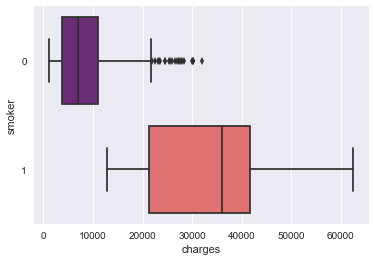

In [79]:
sns.boxplot(y='smoker', x='charges', data=df[df['sex']==1], orient ='h',palette = 'magma')

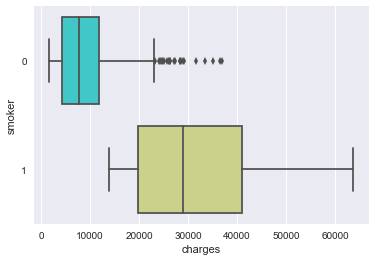

In [80]:
sns.boxplot(y='smoker', x='charges', data = df[df['sex']==0], orient ='h', palette ='rainbow')

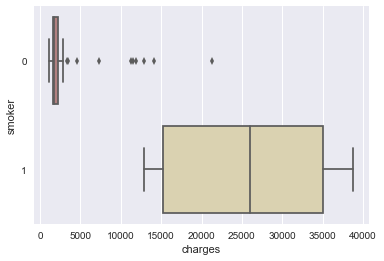

In [83]:
sns.boxplot(y='smoker', x='charges', data = df[df['age']==18], orient='h', palette = 'pink')

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

C:\Users\Shalya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [191]:
x = df.drop(['charges'], axis = 1)
y= df['charges']

In [168]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=0)

In [169]:
lr = LinearRegression().fit(train_x, train_y)

In [170]:
train_y_pred = lr.predict(train_x)
test_y_pred = lr.predict(test_x)

In [171]:
print(lr.score(test_x,test_y))

0.7962732059725786


Polynomial features

In [172]:
x = df.drop(['charges','region'],axis= 1)
y=df['charges']

In [173]:
quad = PolynomialFeatures(degree=2)

In [174]:
x_quad = quad.fit_transform(x)

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(x_quad,y, random_state = 0)

In [176]:
plr = LinearRegression().fit(X_train, Y_train)

In [177]:
X_train_pred = plr.predict(X_train)
X_test_pred = plr.predict(X_test)

In [178]:
plr.score(X_test, Y_test)

0.8849197344147237

Random forest algorithm

In [179]:
rf = RandomForestRegressor(n_estimators = 100,
                          random_state=1,
                          n_jobs =-1,
                          criterion='mse')

In [180]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [181]:
X_train_pred = rf.predict(X_train)
X_test_pred = rf.predict(X_test)

In [182]:
print("MSE of training data : %.3f, MSE of testing data : %.3f" 
      %((mean_squared_error(Y_train, X_train_pred)),
        (mean_squared_error(Y_test,X_test_pred))))

MSE of training data : 3971371.557, MSE of testing data : 20091980.934


In [183]:
print("R2 for training data : %.3f , R2 for testing data %.3f" 
     %((r2_score(Y_train, X_train_pred)),(r2_score(Y_test,X_test_pred))))

R2 for training data : 0.972 , R2 for testing data 0.872


Verifying feature importance


In [195]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state=1,criterion='mse')
rf.fit(X_train,y_train)
test_pred = rf.predict(X_test)

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

In [196]:
rf.feature_importances_

array([0.13844893, 0.00687235, 0.21377897, 0.02150943, 0.60324082,
       0.01614949])

In [197]:
feature_importances

,importance
smoker,0.603241
bmi,0.213779
age,0.138449
children,0.021509
region,0.016149
sex,0.006872


Variance inflation factor check

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.api as sm

In [137]:
features = "+".join(df.drop(['charges'], axis =1).columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('charges ~' + features, df, return_type='dataframe')

In [151]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [154]:
vif['features'] = X.columns

In [153]:
X.columns

Index(['Intercept', 'age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [155]:
vif

,VIF Factor,features
0,33.241509,Intercept
1,1.015394,age
2,1.008889,sex
3,1.040608,bmi
4,1.002482,children
5,1.006466,smoker
6,1.025966,region


All vif values are within 4 so, there is no multicollinearity

Second approach to calculate vif -Comment from author - I wrote variance_inflation_factor under the assumption that we use the design matrix of or for a regression that already includes a constant. Hence, we need a constant to apply vif

In [ ]:
X = df.drop(['charges'], axis=1).assign(const=1)

In [162]:
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index = X.columns)

age          1.015394
sex          1.008889
bmi          1.040608
children     1.002482
smoker       1.006466
region       1.025966
const       33.241509
dtype: float64

If vif is >5, we can exclude that variable in the linear regression and try. Since all are <5,
there is no multicollinearity

xgboost implementation

Internally, XGBoost will automatically learn what is the best direction to go when a value is missing. Equivalently, this can be viewed as automatically "learn" what is the best imputation value for missing values based on reduction on training loss.

In [199]:
import xgboost as xgb

In [200]:
X,y = df.iloc[:,:-1], df.iloc[:,-1]

In [201]:
df_dmatrix = xgb.DMatrix(data = X, label=y)

In [202]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state=0)

In [205]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 10, colsample_bytree= 0.3, 
                          learning_rate= 0.1, max_depth = 5,alpha = 10)

In [206]:
xg_reg.fit(X_train, y_train)

[22:59:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [207]:
preds = xg_reg.predict(X_test)

In [209]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [210]:
print('rmse : %.3f' %rmse)

rmse : 11839.886


Using cross validation in xgboost

In [215]:
params = {'objective': 'reg:squarederror','colsample_bytree': 0.3,'learning_rate':0.1,
         'max_depth':5,'alpha':10}

cv_results = xgb.cv(dtrain = df_dmatrix, params = params, nfold = 3,
                   num_boost_round = 50, early_stopping_rounds = 10,metrics = 'rmse',as_pandas = True,seed=123 )

In [218]:
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,16988.115885,795.916051,16999.115234,359.590463
1,15967.040690,630.410695,15977.343750,520.371248
2,15211.578125,657.612684,15204.496745,484.985478
3,14363.476563,605.675193,14368.713542,498.406187
4,13658.341471,648.112459,13637.224284,586.093418


In [219]:
print(cv_results['test-rmse-mean'].tail(1))

49    8518.667969
Name: test-rmse-mean, dtype: float64


In [229]:
xg_reg = xgb.train(params = params, dtrain = df_dmatrix, num_boost_round = 10)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

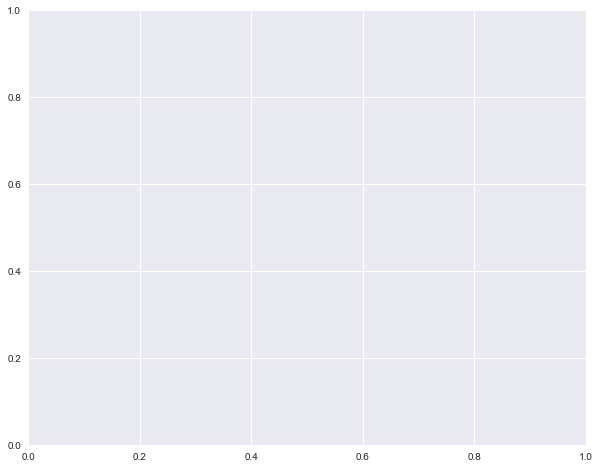

In [234]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

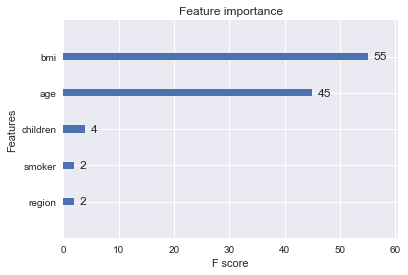

In [232]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] =[10,8]
plt.show()
